In [48]:
from matplotlib import pyplot
import numpy as np
import os

import elasticsearch as es
ES_HOST = "localhost"
escon = es.Elasticsearch(ES_HOST, port=9200)
GACRP_HOME=os.environ['GACRP_HOME']

In [49]:
# elasticsearch 接続確認
body = {
            "size":10,
            "query":{
                "match_all":{}
            }
        }
res=escon.search(index='gacrp_index',body=body)
print(res['hits']['total'])
print(res['hits']['hits'][0]['_source']['channelGrouping'])

903653
Organic Search


In [50]:
# esからデータ取得
body = {
    "size":0,
    "aggs":{
        "aggs_channelGrouping":{
            "terms":{
                "field":"channelGrouping.keyword",
                "order":{"_count":"desc"}
            },
            "aggs":{
                "aggs_avg_revenue":{
                    "avg":{"field":"transactionRevenue"}
                }
            }
        }
    }
}
res=escon.search(index='gacrp_index',body=body)
#print(res['aggregations']['aggs_channelGrouping']['buckets'])
restmp=res['aggregations']['aggs_channelGrouping']['buckets']
for i in range(len(restmp)):
    print(restmp[i]['key'],restmp[i]['doc_count'],restmp[i]['aggs_avg_revenue']['value'])
          

(u'Organic Search', 381561, 855382.258668994)
(u'Social', 226117, 21743.345259312657)
(u'Direct', 143026, 3040290.226951743)
(u'Referral', 104838, 6213681.203380453)
(u'Paid Search', 25326, 1719928.1370923163)
(u'Affiliates', 16403, 36418.94775345973)
(u'Display', 6262, 12509974.449057808)
(u'(Other)', 120, 83250.0)


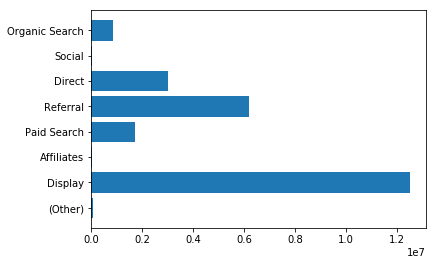

In [51]:
# グラフ化
x=[]
y=[]
ylabel=[]

for i in range(len(restmp)):
    x.append(len(restmp)-i)
    y.append(restmp[i]['aggs_avg_revenue']['value'])
    ylabel.append(restmp[i]['key'])
    
pyplot.barh(x,y,align="center")
pyplot.yticks(x,ylabel)
pyplot.show()    
    

In [52]:
# 横棒グラフの部品化：データ件数/カテゴリごとのrevenue平均
def showBarGraph(field):
    body = {
        "size":0,
        "aggs":{
            "aggs_field":{
                "terms":{
                    "field":field+".keyword",
                    "order":{"_count":"desc"}
                },
                "aggs":{
                    "aggs_avg_revenue":{
                        "avg":{"field":"transactionRevenue"}
                    }
                }
            }
        }
    }
    #print(body)
    
    esRes=escon.search(index='gacrp_index',body=body)
    data=esRes['aggregations']['aggs_field']['buckets']

    graph_x=[]
    graph_y=[]
    graph_ylabel=[]

    graph_avgx=[]
    graph_avgy=[]
    graph_avgylabel=[]

    for i in range(len(data)):
        graph_x.append(len(data)-i)
        graph_y.append(data[i]['doc_count'])
        graph_ylabel.append(data[i]['key'])
    
    pyplot.barh(graph_x,graph_y,align="center")
    pyplot.yticks(graph_x,graph_ylabel)
    pyplot.title(field+" count")
    pyplot.show()

    for i in range(len(data)):
        graph_avgx.append(len(data)-i)
        graph_avgy.append(data[i]['aggs_avg_revenue']['value'])
        graph_avgylabel.append(data[i]['key'])
    
    pyplot.barh(graph_avgx,graph_avgy,align="center")
    pyplot.yticks(graph_avgx,graph_avgylabel)
    pyplot.title(field+" average transactionevenue")
    pyplot.show()

    
    return

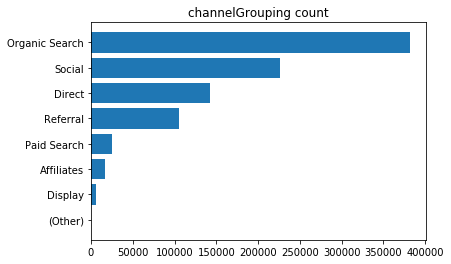

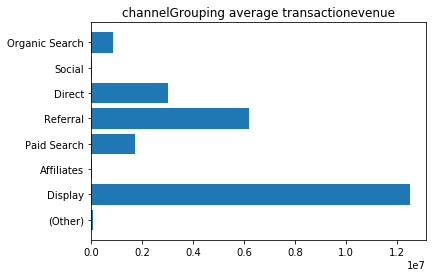

In [53]:
showBarGraph("channelGrouping")

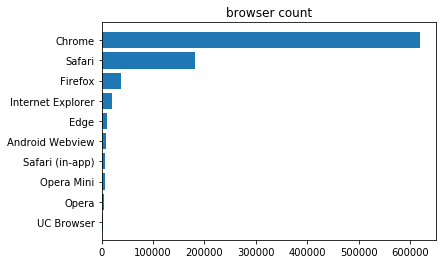

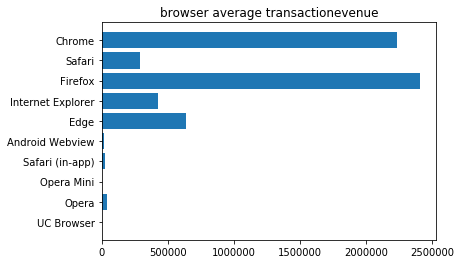

In [54]:
showBarGraph("browser")

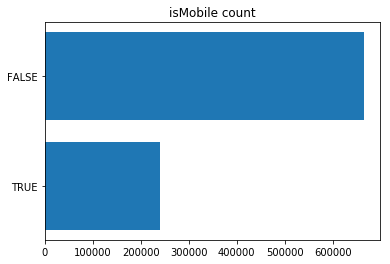

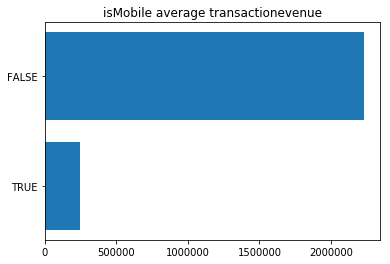

In [55]:
showBarGraph("isMobile")

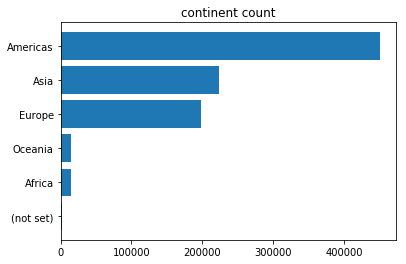

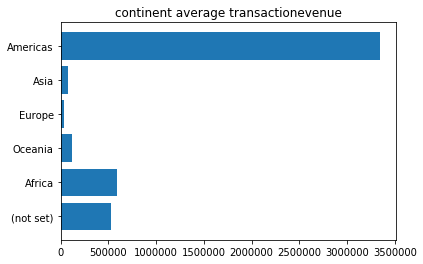

In [56]:
showBarGraph("continent")

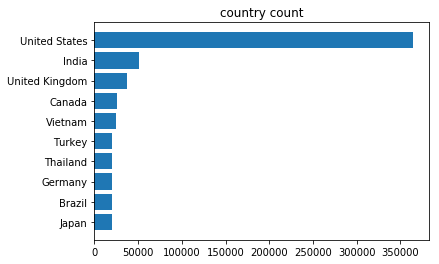

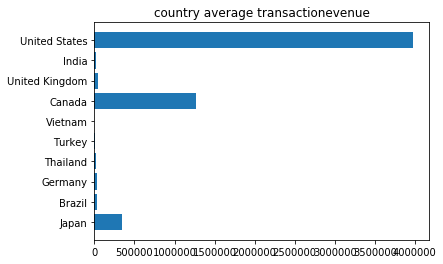

In [57]:
showBarGraph("country")

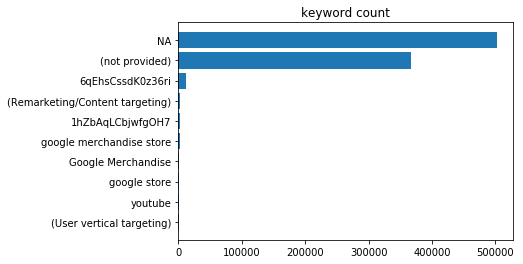

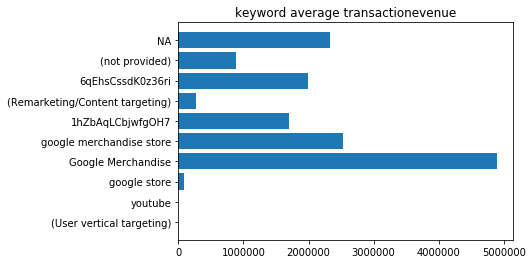

In [58]:
showBarGraph("keyword")

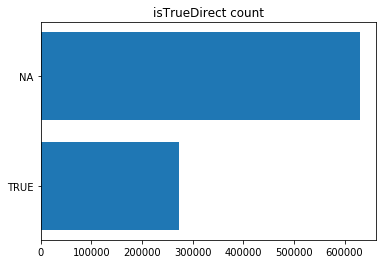

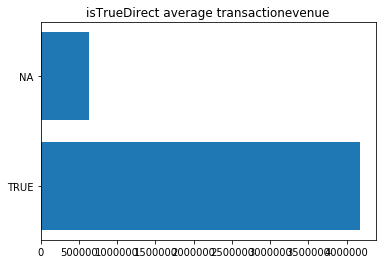

In [59]:
showBarGraph("isTrueDirect")

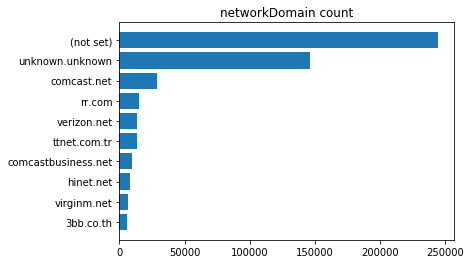

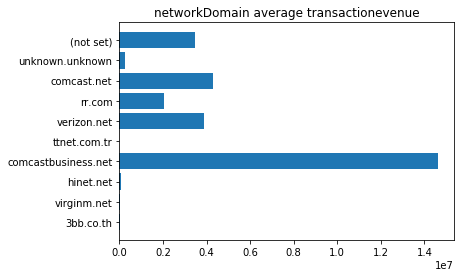

In [60]:
showBarGraph("networkDomain")
#  networkLocation is not available

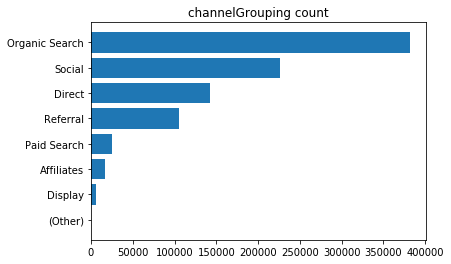

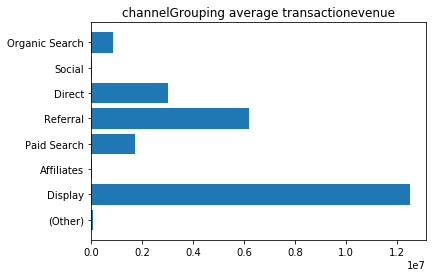

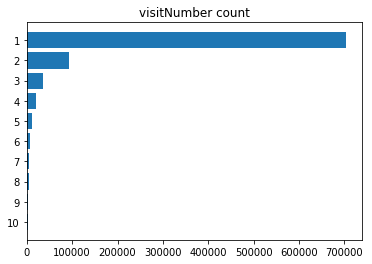

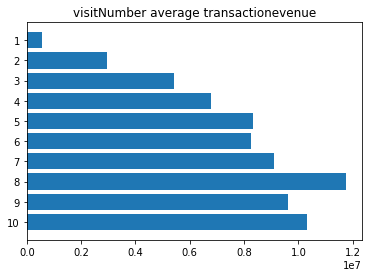

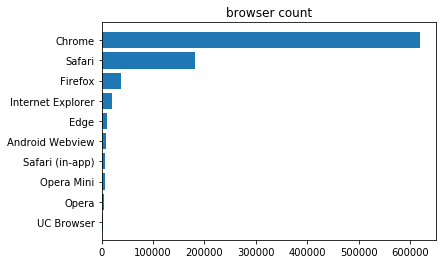

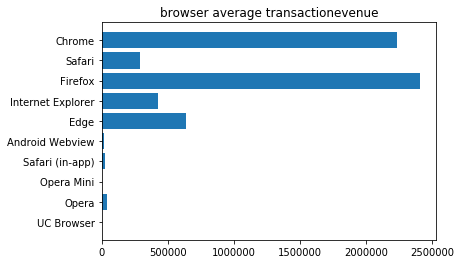

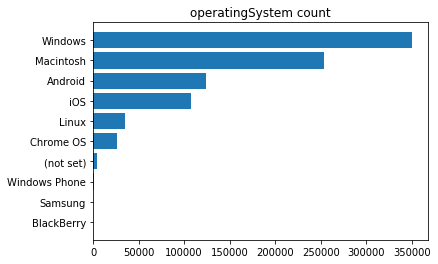

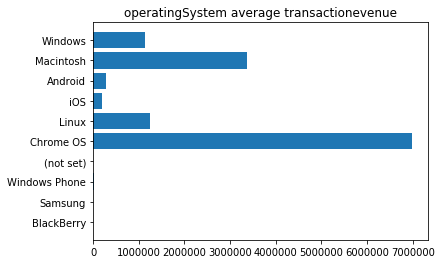

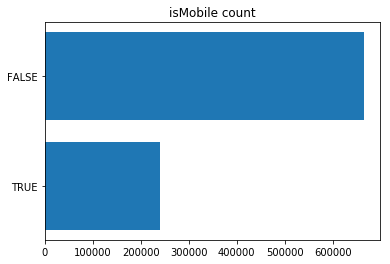

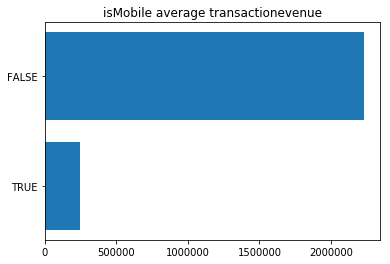

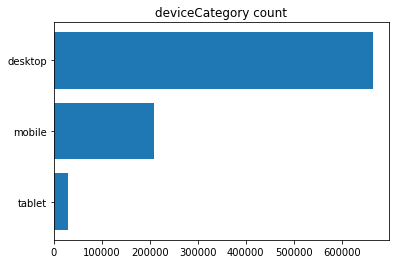

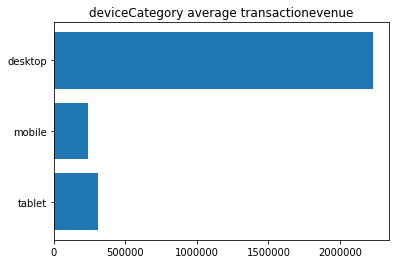

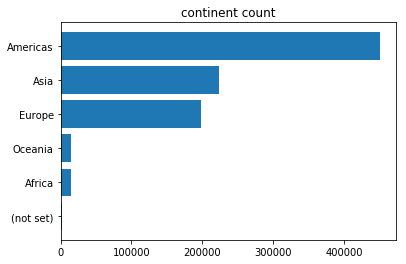

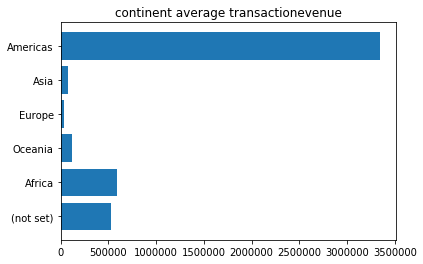

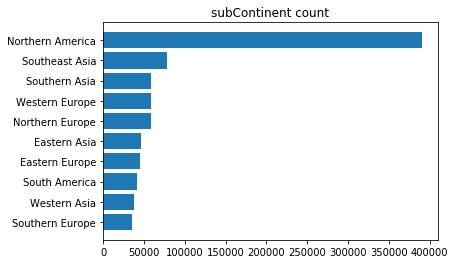

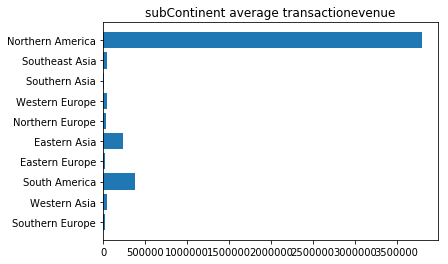

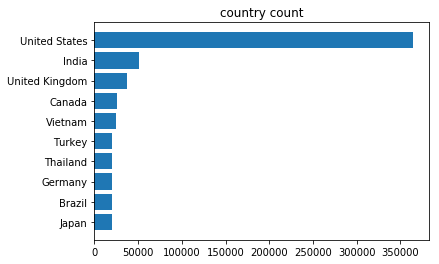

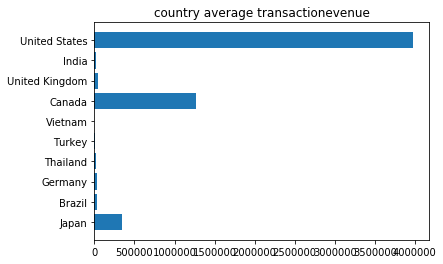

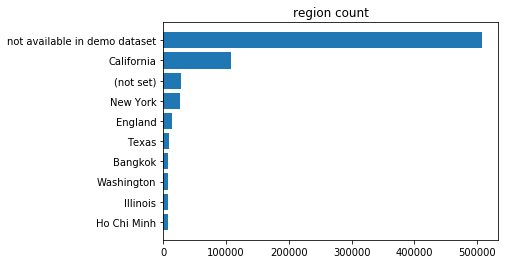

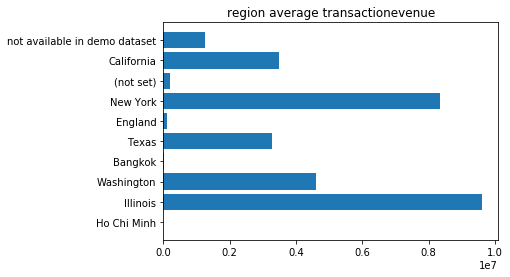

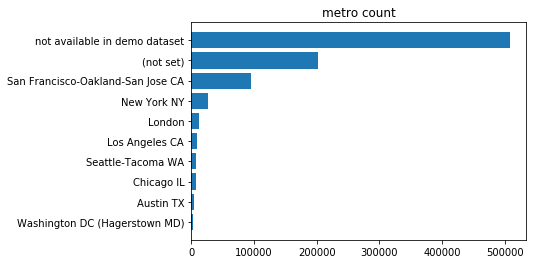

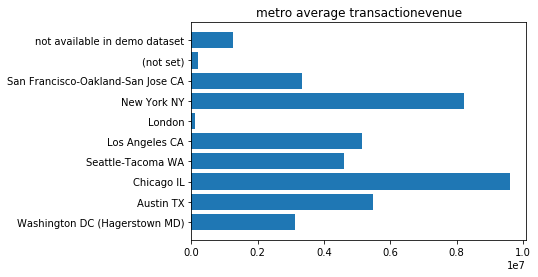

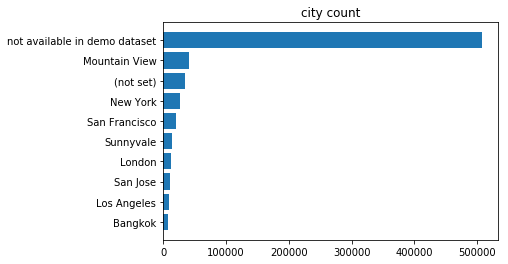

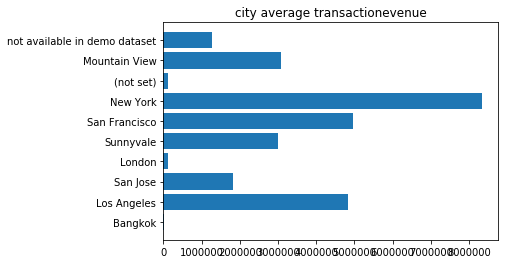

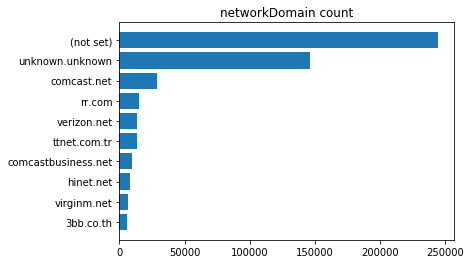

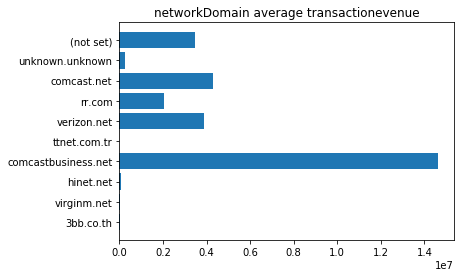

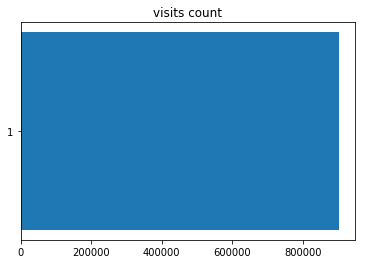

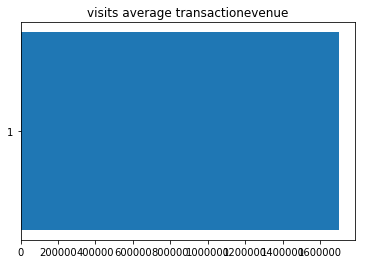

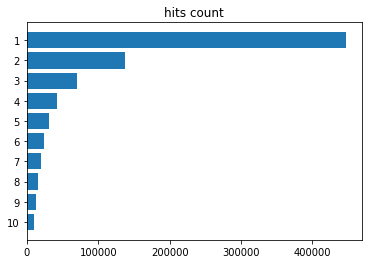

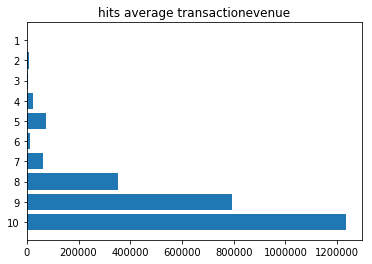

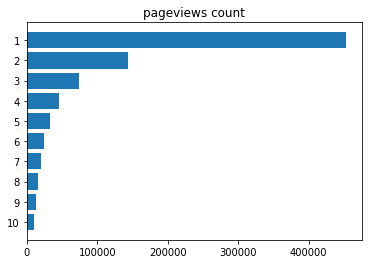

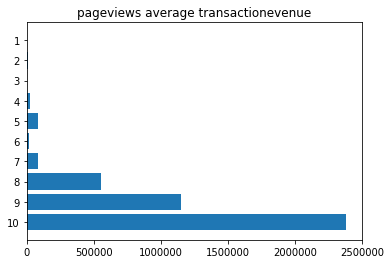

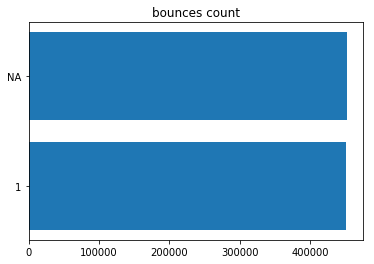

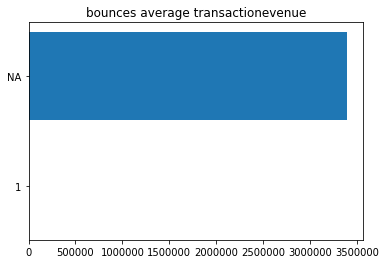

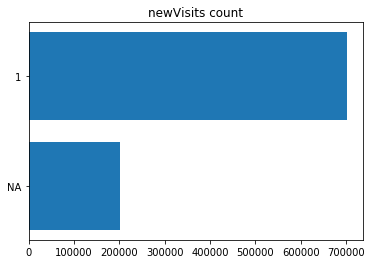

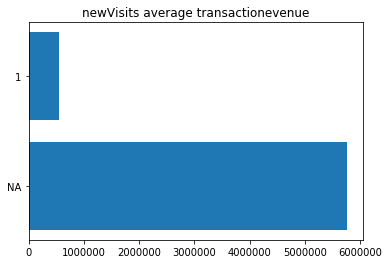

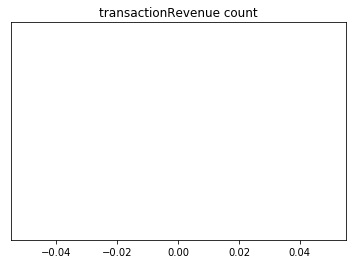

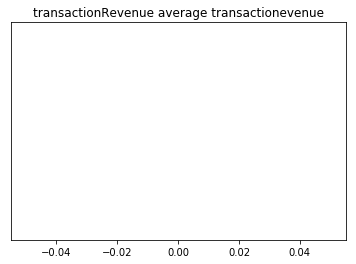

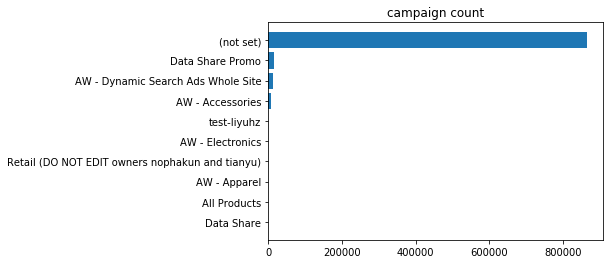

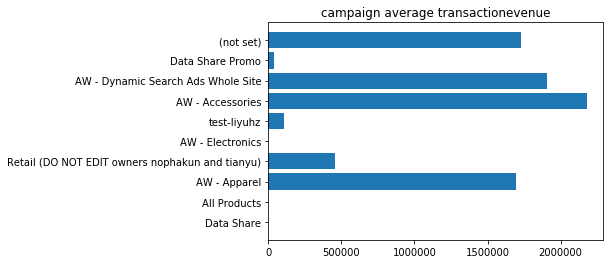

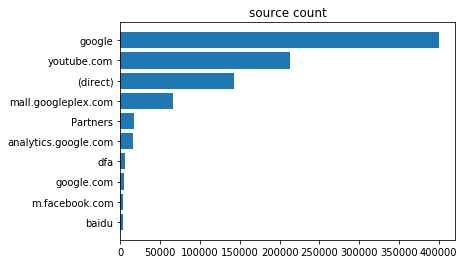

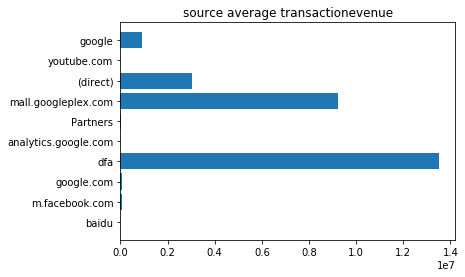

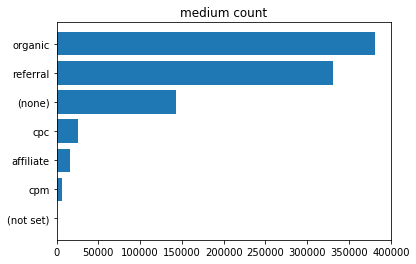

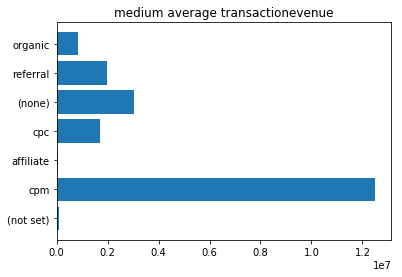

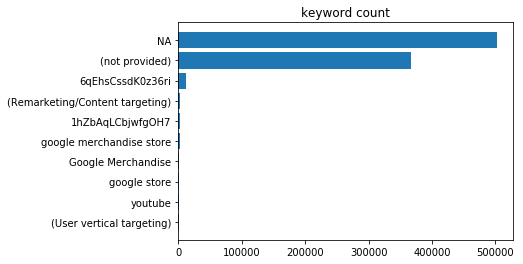

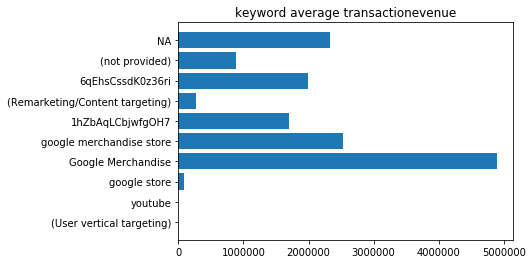

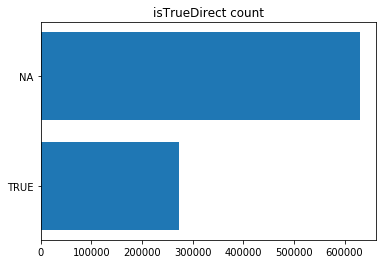

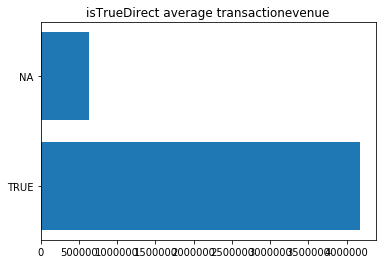

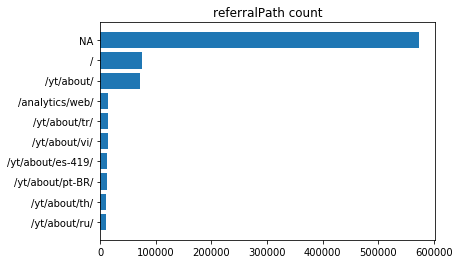

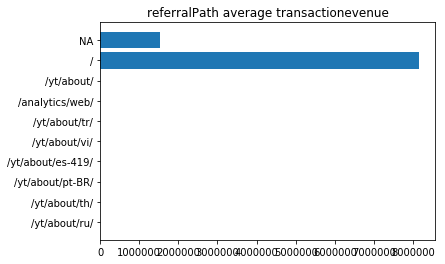

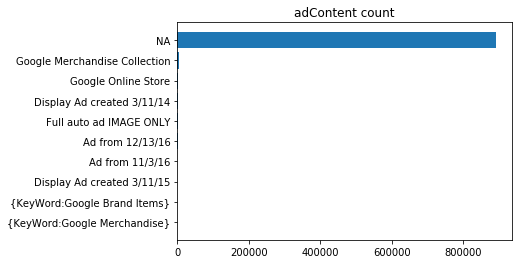

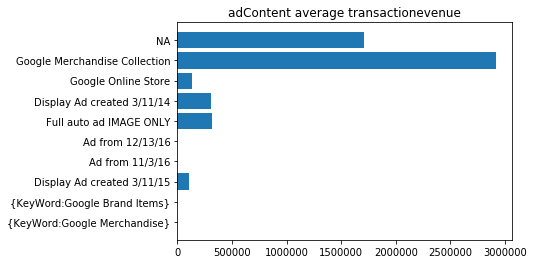

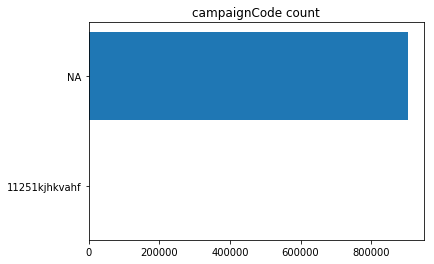

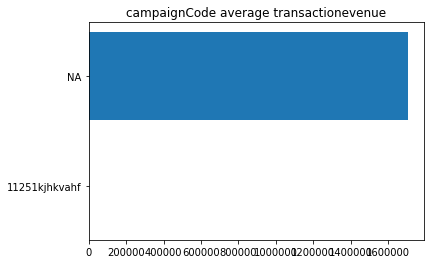

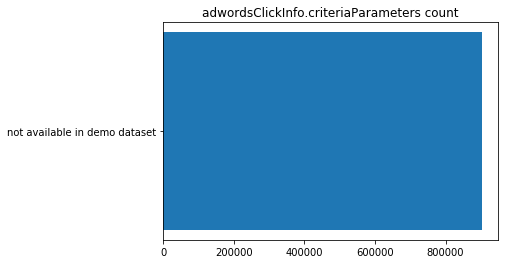

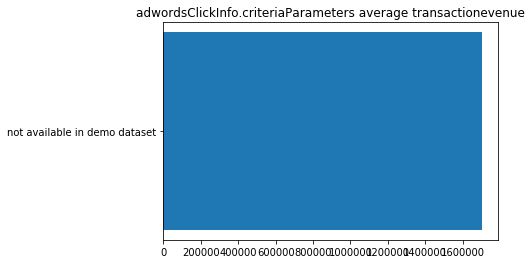

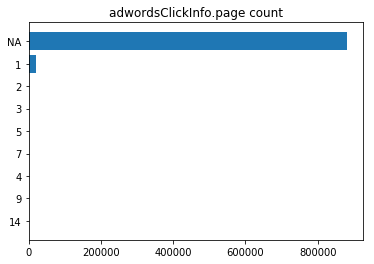

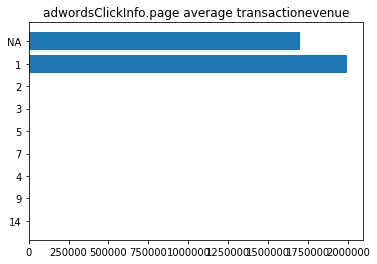

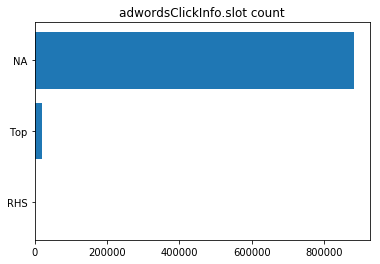

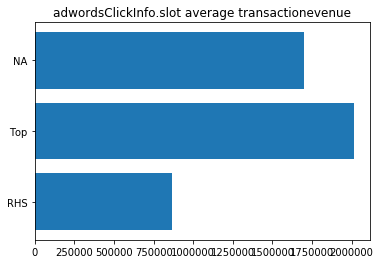

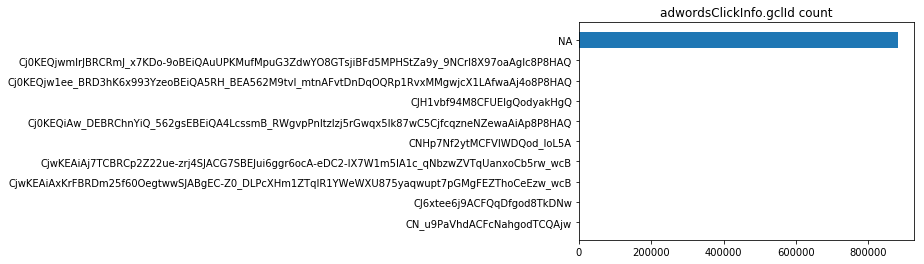

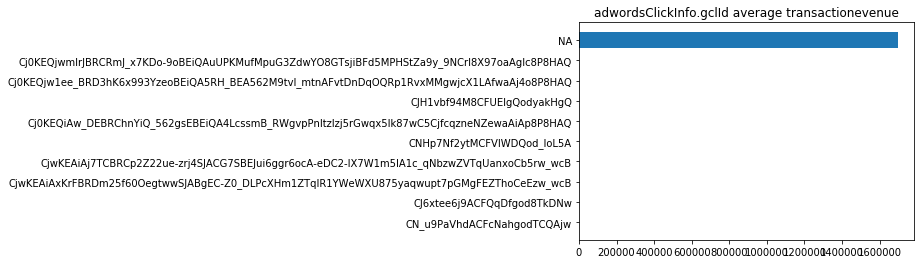

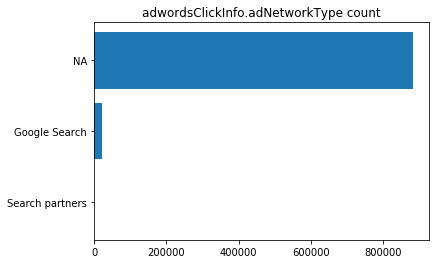

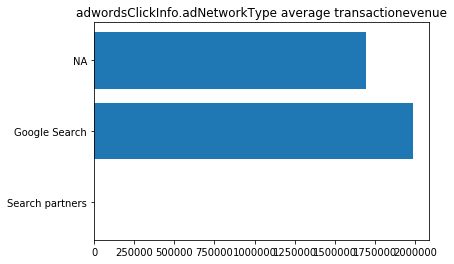

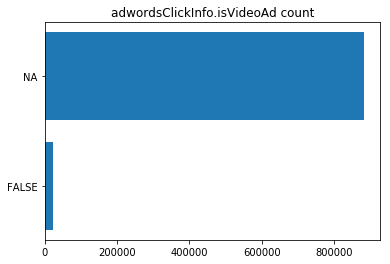

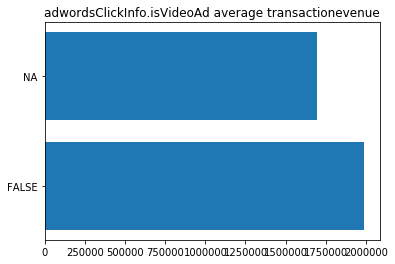

In [61]:
fields=["channelGrouping","visitNumber","browser","operatingSystem","isMobile","deviceCategory","continent","subContinent","country","region","metro","city","networkDomain","visits","hits","pageviews","bounces","newVisits","transactionRevenue","campaign","source","medium","keyword","isTrueDirect","referralPath","adContent","campaignCode","adwordsClickInfo.criteriaParameters","adwordsClickInfo.page","adwordsClickInfo.slot","adwordsClickInfo.gclId","adwordsClickInfo.adNetworkType","adwordsClickInfo.isVideoAd"]
# socialEngagementType,browserVersion,browserSize,"operatingSystemVersion","mobileDeviceBranding",,"mobileDeviceModel","mobileInputSelector","mobileDeviceInfo","mobileDeviceMarketingName","flashVersion","language","screenColors","screenResolution","cityId","latitude","longitude","networkLocation"
for field in fields:
    showBarGraph(field)
    